In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sub_utils import load_cat_data
from utils import input_output_layer_sizes, nn_model, predict, sigmoid, relu, metrics, linear, tanh, leaky_relu, randomly_initialize_parameters

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_cat_data()

y = 1. It's a cat picture.


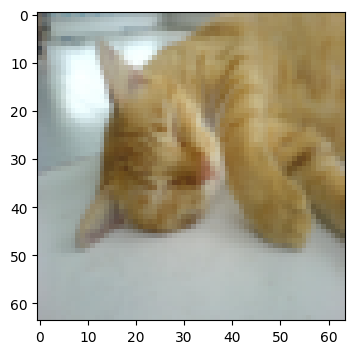

In [3]:
# Example of a picture
index = 121
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

In [7]:

# Shallow neural network 
# [relu: 7] -> [sigmoid: 1]
n_x, n_y = input_output_layer_sizes(train_x, train_y)
layer_dims = [n_x, 7, n_y]
activations = [relu, sigmoid]
parameters = randomly_initialize_parameters(layer_dims)

parameters, costs = nn_model(train_x, train_y, layer_dims, parameters, activations, learning_rate=0.0075, print_cost=True,number_of_iterations=6000)

Cost after iteration 0: 0.989611
Cost after iteration 100: 0.780135
Cost after iteration 200: 0.654090
Cost after iteration 300: 0.652067
Cost after iteration 400: 0.650224
Cost after iteration 500: 0.644425
Cost after iteration 600: 0.652494
Cost after iteration 700: 0.610135
Cost after iteration 800: 0.572243
Cost after iteration 900: 0.530917
Cost after iteration 1000: 0.489952
Cost after iteration 1100: 0.451227
Cost after iteration 1200: 0.414926
Cost after iteration 1300: 0.380943
Cost after iteration 1400: 0.348923
Cost after iteration 1500: 0.319275
Cost after iteration 1600: 0.288779
Cost after iteration 1700: 0.256318
Cost after iteration 1800: 0.220000
Cost after iteration 1900: 0.345155
Cost after iteration 2000: 0.107429
Cost after iteration 2100: 0.090672
Cost after iteration 2200: 0.077326
Cost after iteration 2300: 0.066589
Cost after iteration 2400: 0.057876
Cost after iteration 2500: 0.050740
Cost after iteration 2600: 0.044841
Cost after iteration 2700: 0.039921
Cost

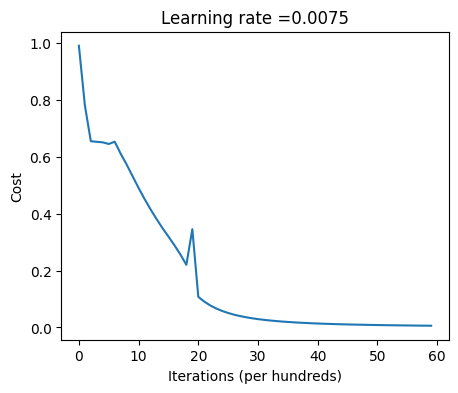

In [8]:
from helper_functions import plot_learning_curve

plot_learning_curve(cost_history=costs, learning_rate=0.0075)

In [9]:
predictions_train = predict(parameters, activations, train_x)
predictions_train

array([[False, False,  True, False, False, False, False,  True, False,
        False, False,  True, False,  True,  True, False, False, False,
        False,  True, False, False, False, False,  True,  True, False,
         True, False,  True, False, False, False, False, False, False,
        False, False,  True, False, False,  True,  True, False, False,
        False, False,  True, False, False,  True, False, False, False,
         True, False,  True,  True, False,  True,  True,  True, False,
        False, False, False, False, False,  True, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False,  True,  True, False, False, False,  True, False,
        False, False,  True,  True,  True, False, False,  True, False,
        False, False, False,  True, False,  True, False,  True,  True,
         True,  True,  True,  True, False, False, False, False, False,
         True, False, False, False,  True, False, False,  True, False,
      

In [10]:
metrics(train_y, predictions_train, len(activations))

Precision for n_h=2: 100.0 %
Recall for n_h=2: 100.0 %
Accuracy for n_h=2: 100.0 %


In [11]:
predictions_test = predict(parameters, activations, test_x)
predictions_test

array([[ True,  True,  True,  True,  True, False, False,  True,  True,
         True, False, False,  True,  True, False,  True, False,  True,
        False, False,  True, False, False,  True, False,  True,  True,
        False, False,  True, False,  True,  True,  True, False, False,
        False,  True, False, False,  True, False,  True, False,  True,
         True, False,  True,  True, False]])

In [12]:
metrics(test_y, predictions_test, len(activations))

Precision for n_h=2: 85.18518518518519 %
Recall for n_h=2: 69.6969696969697 %
Accuracy for n_h=2: 72.0 %


In [15]:

# Deep neural network 
# [relu: 20] -> [relu: 7] -> [relu: 5] -> [sigmoid: 1]
n_x, n_y = input_output_layer_sizes(train_x, train_y)
layer_dims = [n_x, 20, 7, 5, n_y]
activations = [relu, relu, relu, sigmoid]

import pickle

# Read dictionary pkl file

# with open('parameters[relu:20]->[relu:7]->[relu:5]->[sigmoid:1].pkl', 'rb') as fp:
#     parameters = pickle.load(fp)

parameters = randomly_initialize_parameters(layer_dims)

parameters, costs = nn_model(train_x, train_y, layer_dims, parameters, activations, learning_rate=0.0075, print_cost=True,number_of_iterations=500000)

Cost after iteration 0: 0.693478
Cost after iteration 100: 0.677894
Cost after iteration 200: 0.667183
Cost after iteration 300: 0.659471
Cost after iteration 400: 0.653423
Cost after iteration 500: 0.648691
Cost after iteration 600: 0.646744
Cost after iteration 700: 0.646420
Cost after iteration 800: 0.646294
Cost after iteration 900: 0.646181
Cost after iteration 1000: 0.646072
Cost after iteration 1100: 0.645968
Cost after iteration 1200: 0.645867
Cost after iteration 1300: 0.645769
Cost after iteration 1400: 0.645675
Cost after iteration 1500: 0.645585
Cost after iteration 1600: 0.645497
Cost after iteration 1700: 0.645413
Cost after iteration 1800: 0.645332
Cost after iteration 1900: 0.645255
Cost after iteration 2000: 0.645180
Cost after iteration 2100: 0.645108
Cost after iteration 2200: 0.645039
Cost after iteration 2300: 0.644973
Cost after iteration 2400: 0.644909
Cost after iteration 2500: 0.644849
Cost after iteration 2600: 0.644791
Cost after iteration 2700: 0.644736
Cost

KeyboardInterrupt: 

In [ ]:
from helper_functions import plot_learning_curve

plot_learning_curve(cost_history=costs, learning_rate=0.0075)

In [ ]:
import pickle


# save dictionary to person_data.pkl file
with open('parameters[relu:20]->[relu:7]->[relu:5]->[sigmoid:1].pkl', 'wb') as fp:
    pickle.dump(parameters, fp)
    print('Parameters saved successfully to file')

In [ ]:
predictions_train = predict(parameters, activations, train_x)
predictions_train

In [ ]:
metrics(train_y, predictions_train, len(activations))

In [ ]:
predictions_test = predict(parameters, activations, test_x)
predictions_test

In [ ]:
metrics(test_y, predictions_test, len(activations))